In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [9]:
EPS = 5
MIN_POINTS = 4

fake_data = pd.read_csv("dupremoved_trackdata.csv", sep = ",")

# Column 9, "mode", has been removed to increase sanity of results, as it restricted DBScan to only 2 possible clusters
# put as '8' back into the hardcoded array of numbers to add it back in
# Column 10, time was milliseconds & has been removed for obvious reasons
data = fake_data.to_numpy()[:, [4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17]].astype(np.double)

scanner = DBSCAN(eps=EPS, min_samples=MIN_POINTS).fit(data)
labels = scanner.labels_
bi = [bool(i) for i in (labels + 1)]
bool_idx = np.array(bi)

cleaned_data = fake_data.to_numpy()[bool_idx]
cleaned_dataframe = pd.DataFrame(data=cleaned_data, columns=fake_data.columns, index=fake_data.index[bool_idx])
cleaned_dataframe.to_csv("dbscanned_trackdata.csv", sep=",")

In [10]:
print("Number of clusters: ", len(set(labels)) - (1 if -1 in labels else 0))
if (len(cleaned_data)):
    print("# of removed songs: ", np.shape(data)[0] - np.shape(cleaned_data)[0])
else:
    print("Removed all songs")

Number of clusters:  1
# of removed songs:  37


In [89]:
# Used to brute-force the "best" espsilon & min_points values
def trial_metric(data, metric='euclidean', start_eps=5, start_min_points=3, step_eps=5, step_min_points=1, end_eps=155, end_min_points=16, removal_cutoff=200):
    results = [[], [], []]

    for mp in range(start_min_points, end_min_points, step_min_points):
        for epsilon in range(start_eps, end_eps, step_eps):
            scan = DBSCAN(eps=epsilon, min_samples=mp, metric=method).fit(data)
            lab = scan.labels_
            b_i = [bool(i) for i in (lab + 1)]
            booled = np.array(b_i)
            clean = fake_data.to_numpy()[booled]

            if (np.shape(data)[0] - np.shape(cleaned_data)[0] < removal_cutoff):
                results[0].append(epsilon)
                results[1].append(mp)
                results[2].append(np.shape(data)[0] - np.shape(clean)[0])
    return np.array(results)

    results = trial_metric(data)

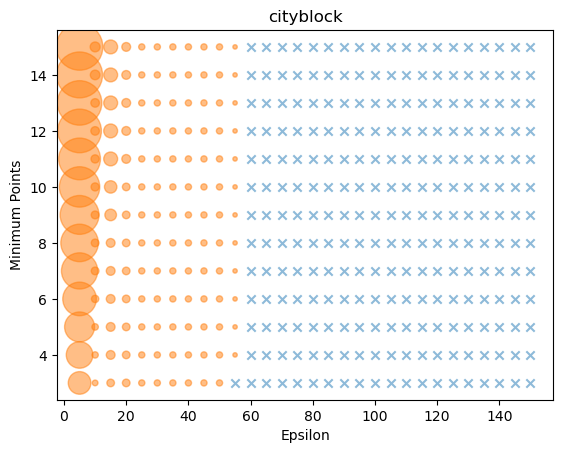

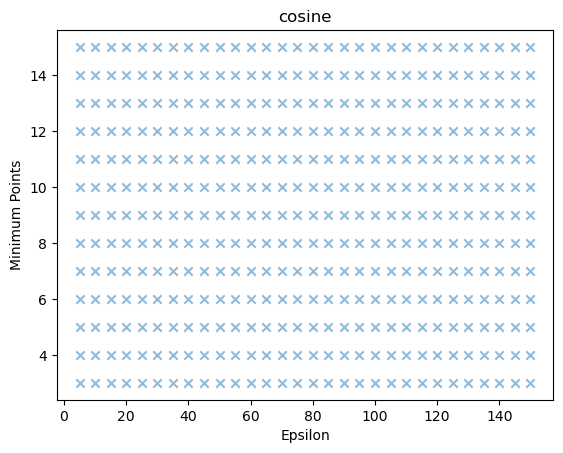

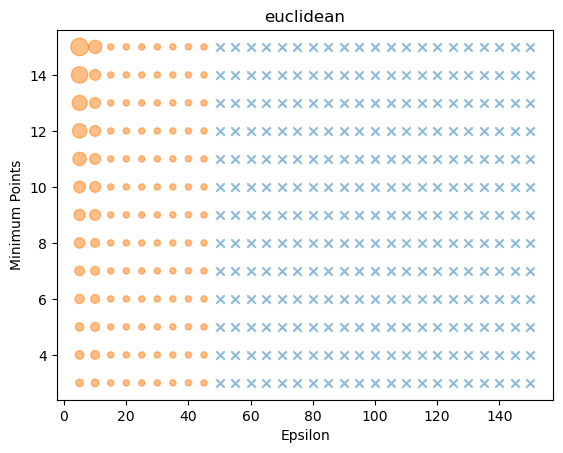

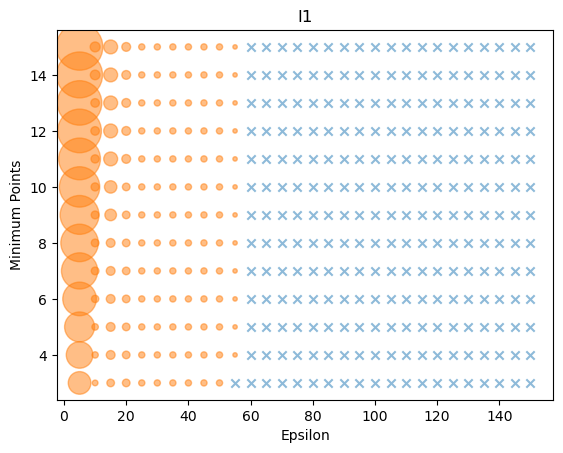

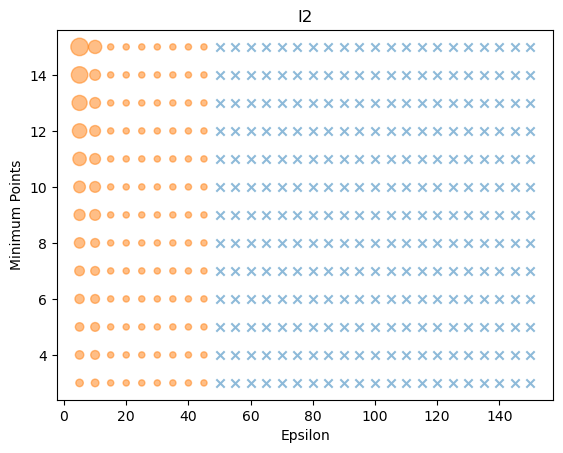

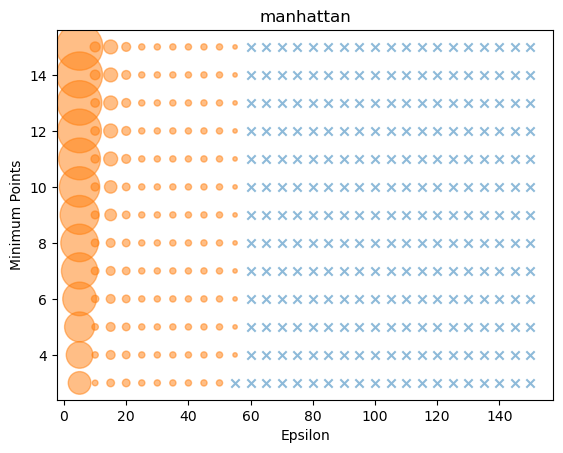

In [90]:
_method_list=['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
_extended_method_list=['braycurtis', 'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

# Runs through every method in the list & plots the results
# Red circles indicate removed songs. Very small circles are multiplied by 10 for visibility
# Blue crosses indicate not songs removed
# Takes about 15 minutes to run on my computer, you can uncomment & run the extended list if you want
"""
for method in _method_list:
    results = trial_metric(data, metric=method)

    plt.scatter(results[0][np.where(results[2] == 0)], results[1][np.where(results[2] == 0)], marker="x", alpha=0.5)
    plt.scatter(results[0], results[1], s=np.where(results[2] > 10, results[2], results[2] * 10), alpha=0.5)
    plt.xlabel("Epsilon")
    plt.ylabel("Minimum Points")
    plt.title(method)
    plt.show()
"""
